In [88]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
import matplotlib.dates as mdates

from scipy import stats

In [3]:
# READ THE FILES
df_year = pd.read_csv('annual_deaths_by_clinic.csv')

In [4]:
df_month = pd.read_csv('monthly_deaths.csv')

In [7]:
# EXPLORATION OF OUT 2 DATAFRAMES

In [5]:
df_year.shape

(12, 4)

In [6]:
df_month.shape

(98, 3)

In [69]:
df_month.head(6)

date  births  deaths  pct_deaths
0  1841-01-01     254      37    0.145669
1  1841-02-01     239      18    0.075314
2  1841-03-01     277      12    0.043321
3  1841-04-01     255       4    0.015686
4  1841-05-01     255       2    0.007843
5  1841-06-01     200      10    0.050000

In [8]:
df_month.tail()

date  births  deaths
93  1848-11-01     310       9
94  1848-12-01     373       5
95  1849-01-01     403       9
96  1849-02-01     389      12
97  1849-03-01     406      20

In [10]:
df_year.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [11]:
df_year.tail()

year  births  deaths    clinic
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

In [12]:
# let's check if there are NAN values in our df
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [13]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [23]:
# LET'S CHECK FOR DUPLICATED VALUES
print(f"Any duplicated values in  df_year : {df_year.duplicated().values.any()}")
print(f"Any duplicated values in  df_month : {df_month.duplicated().values.any()}")

Any duplicated values in  df_year : False
Any duplicated values in  df_month : False


In [24]:
# LET'S SEE SOME STATISTICS

df_month.describe()

births     deaths
count   98.000000  98.000000
mean   267.000000  22.469388
std     41.769372  18.141031
min    190.000000   0.000000
25%    242.500000   8.000000
50%    264.000000  16.500000
75%    292.750000  36.750000
max    406.000000  75.000000

In [ ]:
# We see that on average there were about 267 births and 22.47 deaths per month.

In [25]:
df_year.describe()

year       births      deaths
count    12.000000    12.000000   12.000000
mean   1843.500000  3152.750000  223.333333
std       1.783765   449.078476  145.383089
min    1841.000000  2442.000000   66.000000
25%    1842.000000  2901.750000  100.250000
50%    1843.500000  3108.500000  219.500000
75%    1845.000000  3338.250000  263.500000
max    1846.000000  4010.000000  518.000000

In [26]:
# We see that on average there were about 3152.750000 births and 223.333333 deaths per year.

In [27]:
# LET'S SEE THE Percentage of Women Dying in Childbirth

prob = df_year.deaths.sum() / df_year.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


In [28]:
# Childbirth was very risky.
# About 7.08% of women died in the 1840s.

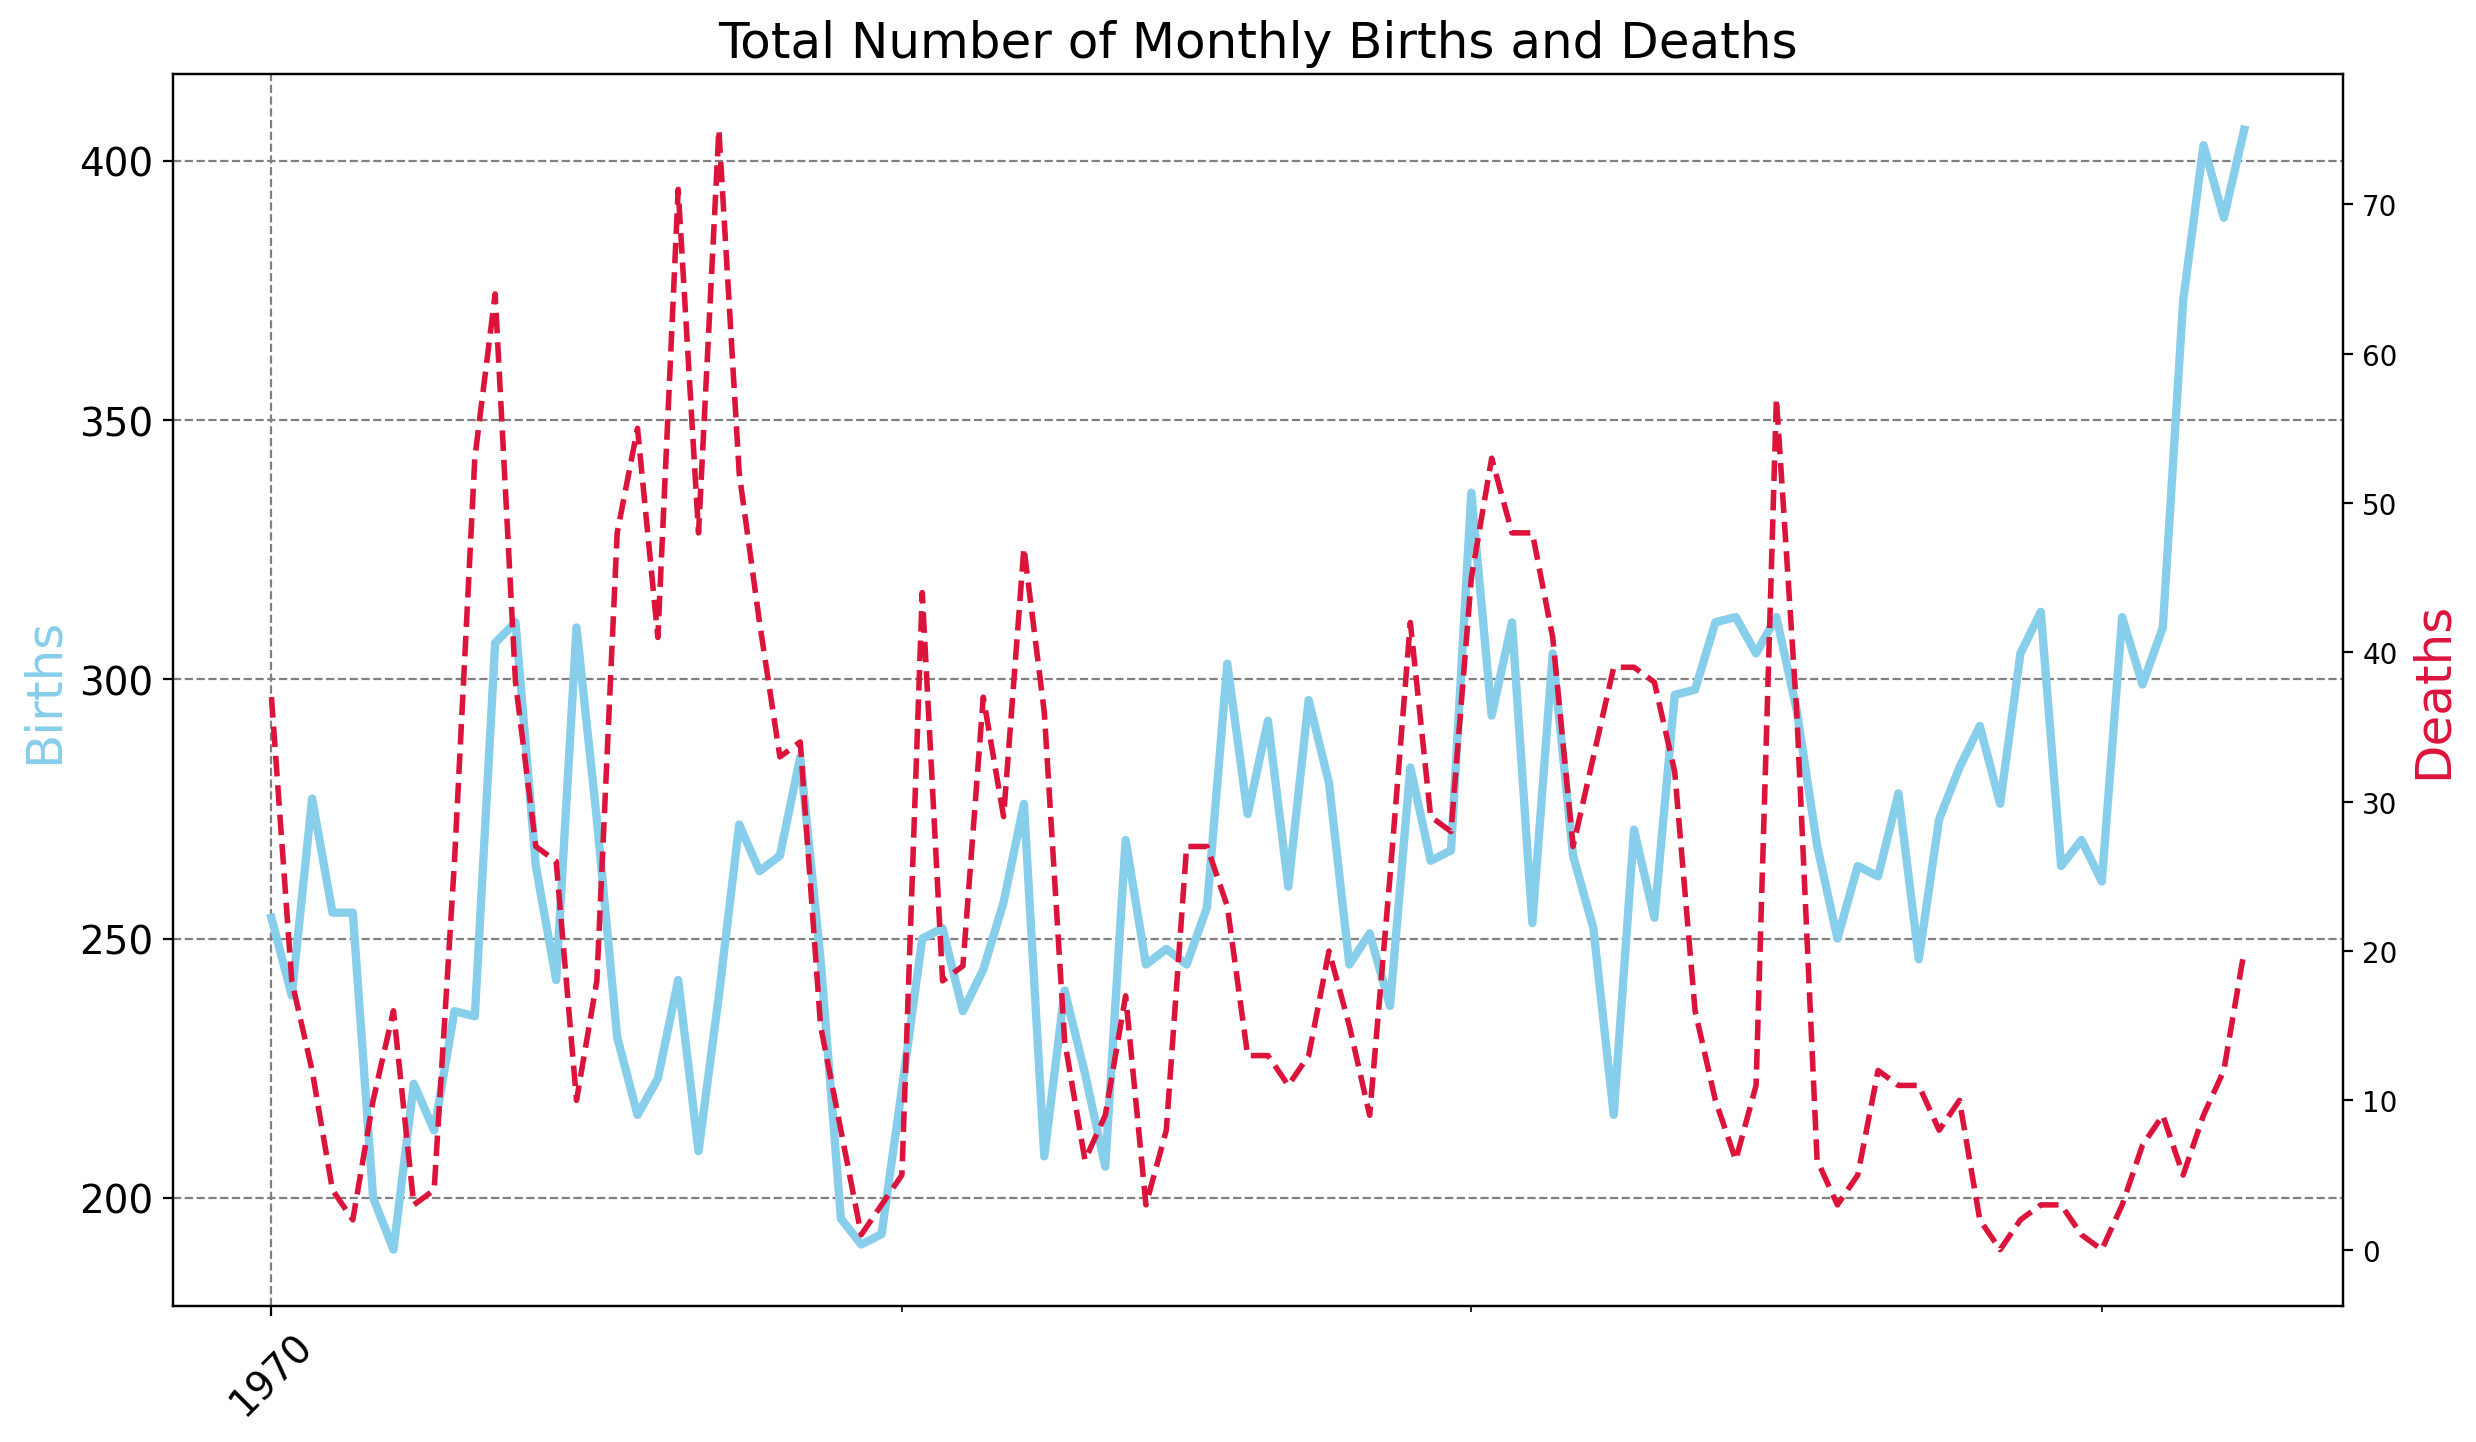

In [51]:
# Let Visualise the Total Number of Births and Deaths over Time

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# ------------------------------------------------------------

plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# Use Locators

# ax1.set_xlim([df_month.date.min(), df_month.date.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_month.date, 
         df_month.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_month.date, 
         df_month.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()


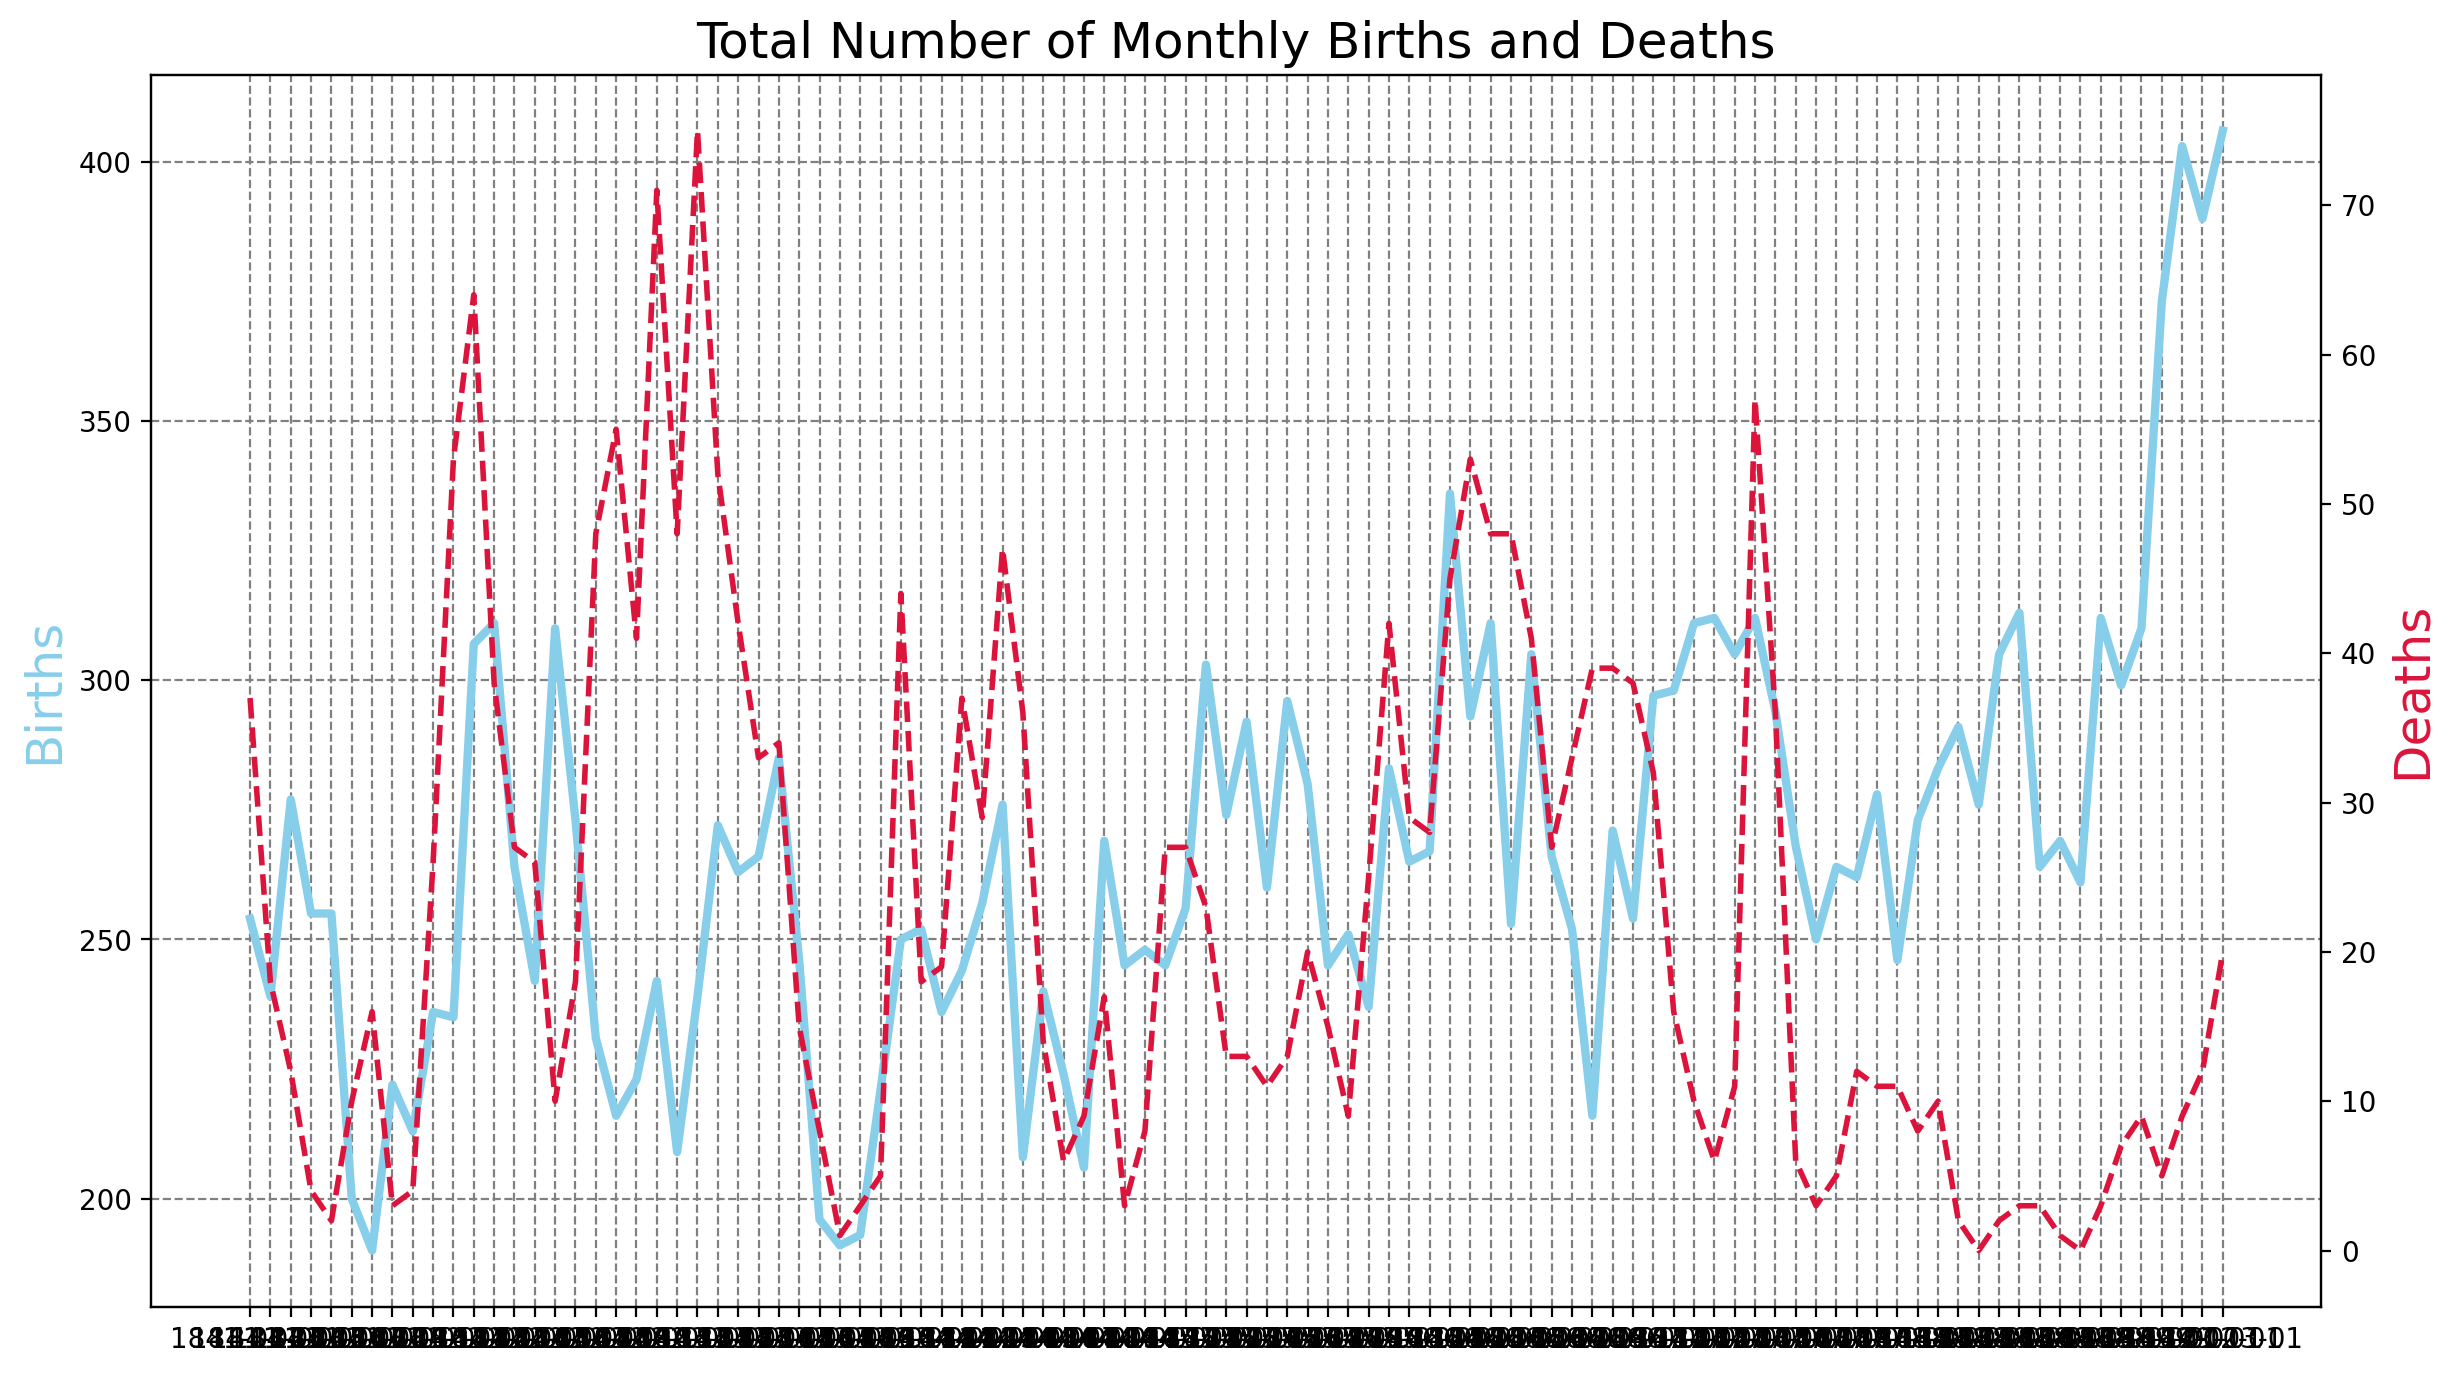

In [43]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.grid(color='grey', linestyle='--')

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
ax1.plot(df_month.date, 
         df_month.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_month.date, 
         df_month.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

In [52]:
# We see that something happened after 1847. 
# The total number of deaths seems to have dropped, despite an increasing number of births.

In [53]:
# Analysing the Yearly Data Split By Clinic

# There are two maternity wards at the Vienna General Hospital: 
# clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, 
# and clinic 2 was staffed by female midwives.



In [54]:
# LET'S SEE THE TOTAL BIRTH BY CLINIC OVER THE YEAR

line = px.line(df_year, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

In [55]:
# We see that more and more women gave birth at the hospital over the years.
# More births took place in clinic 1 than in clinic 2.



In [56]:
# # LET'S SEE THE TOTAL BIRTH BY CLINIC over the year

line = px.line(df_year, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

In [57]:
# We see that, not only were more people born in clinic 1, more people also died in clinic 1.



In [58]:
# Calculate the Proportion of Deaths at Each Clinic

df_year['pct_deaths'] = df_year.deaths / df_year.births


In [59]:
# The average death rate for the entire time period for clinic 1 

clinic_1 = df_year[df_year.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')


Average death rate in clinic 1 is 9.92%.


In [60]:
# The average death rate for the entire time period for clinic 2 

clinic_2 = df_year[df_year.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


In [61]:
#  In comparison, clinic 2 which was staffed by midwives had a much lower 
# death rate of 3.88% over the course of the entire period. 

In [62]:
line = px.line(df_year, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

In [63]:
# clinic 2 had a consistently lower death rate than clinic 1! 

In [64]:
# The Effect of Handwashing

# In June 1846, Dr Semmelweis ordered everyone on 
# his medical staff to start cleaning their hands and instruments 
# not just with soap and water but with a chlorine solution 
# (he didn't know it at the time, but chlorine is an amazing disinfectant).

In [65]:
# let's add a column with the proportion of deaths per birth

df_month['pct_deaths'] = df_month.deaths/df_month.births


In [66]:
# Let's create two subsets based on the handwashing_start date

In [70]:
handwashing_start = '1846-06-01'
before_washing = df_month[df_month.date < handwashing_start]
after_washing = df_month[df_month.date >= handwashing_start]


In [71]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.6%
Average death rate AFTER 1847 was 4.87%


In [72]:
# The death rate per birth dropped dramatically
# after handwashing started - from 10.6% to 4.87%.

In [73]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [75]:
# plt.figure(figsize=(14,8), dpi=200)
# plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14, rotation=45)
 
# plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(years_fmt)
# ax.xaxis.set_minor_locator(months)
# ax.set_xlim([df_month.date.min(), df_month.date.max()])
 
# plt.grid(color='grey', linestyle='--')
 
# ma_line, = plt.plot(roll_df.index, 
#                     roll_df.pct_deaths, 
#                     color='crimson', 
#                     linewidth=3, 
#                     linestyle='--',
#                     label='6m Moving Average')
# bw_line, = plt.plot(before_washing.date, 
#                     before_washing.pct_deaths,
#                     color='black', 
#                     linewidth=1, 
#                     linestyle='--', 
#                     label='Before Handwashing')
# aw_line, = plt.plot(after_washing.date, 
#                     after_washing.pct_deaths, 
#                     color='skyblue', 
#                     linewidth=3, 
#                     marker='o',
#                     label='After Handwashing')
 
# plt.legend(handles=[ma_line, bw_line, aw_line],
#            fontsize=18)
 
# plt.show()

In [76]:
# Visualising Distributions and Testing for Statistical Significance

# Calculate the Difference in the Average Monthly Death Rate


In [77]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 5.07%.
Handwashing reduced the monthly proportion of deaths by 5.43%!
This is a 2.1x improvement!


In [79]:
# Using Box Plots to Show How the Death Rate Changed Before and After Handwashing

df_month['washing_hands'] = np.where(df_month.date < handwashing_start, 'No', 'Yes')

box = px.box(df_month, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

In [80]:
# Here we also see the massive spike in deaths in late 1842.
# Over 30% of women who gave birth that month died in hospital.
# What we also see in the box plot is how not only did the average death rate come down, 
# but so did the overall range - we have a lower max and 3rd quartile too.

In [81]:
# Use Histograms to Visualise the Monthly Distribution of Outcomes

hist = px.histogram(df_month, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

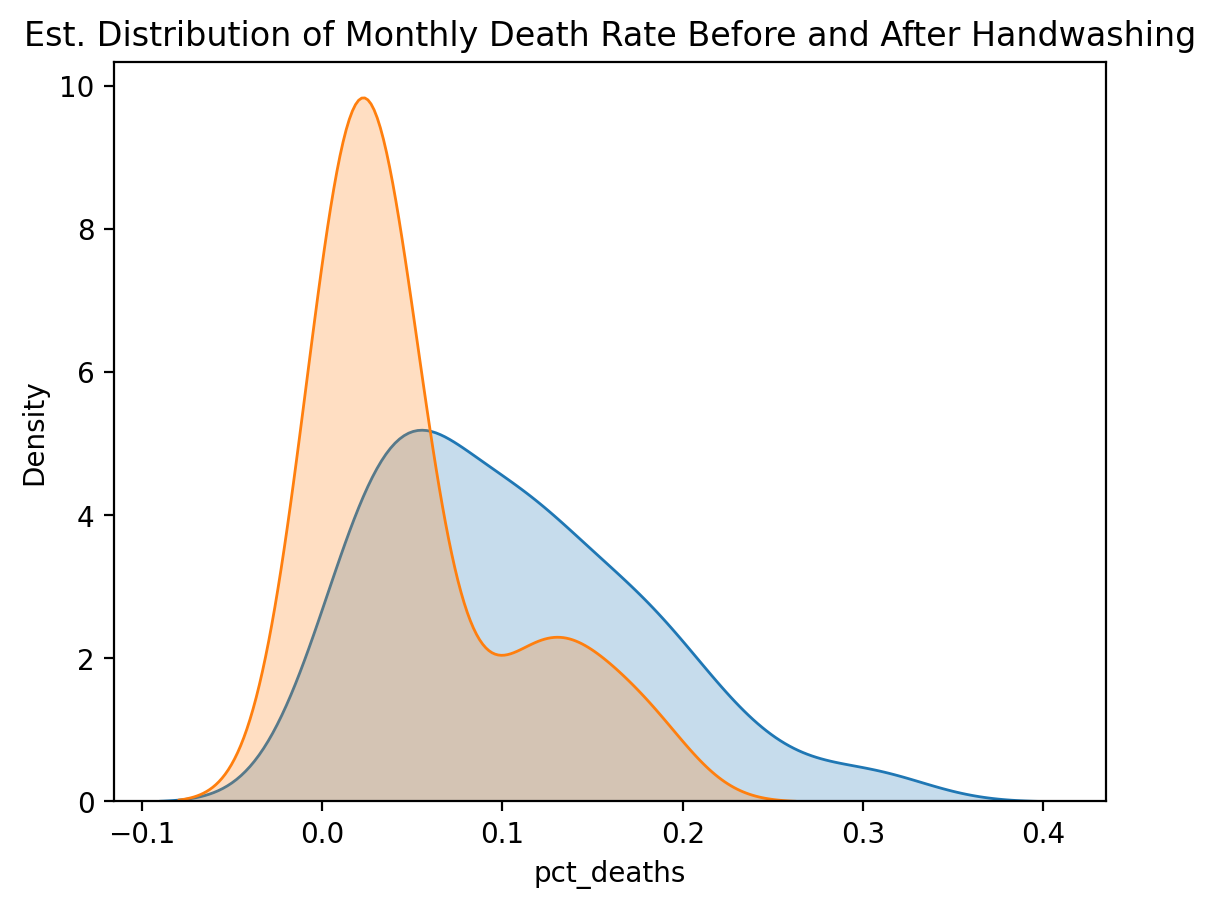

In [82]:
# Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

In [83]:
# we end up with a negative monthly death rate on the left tail.

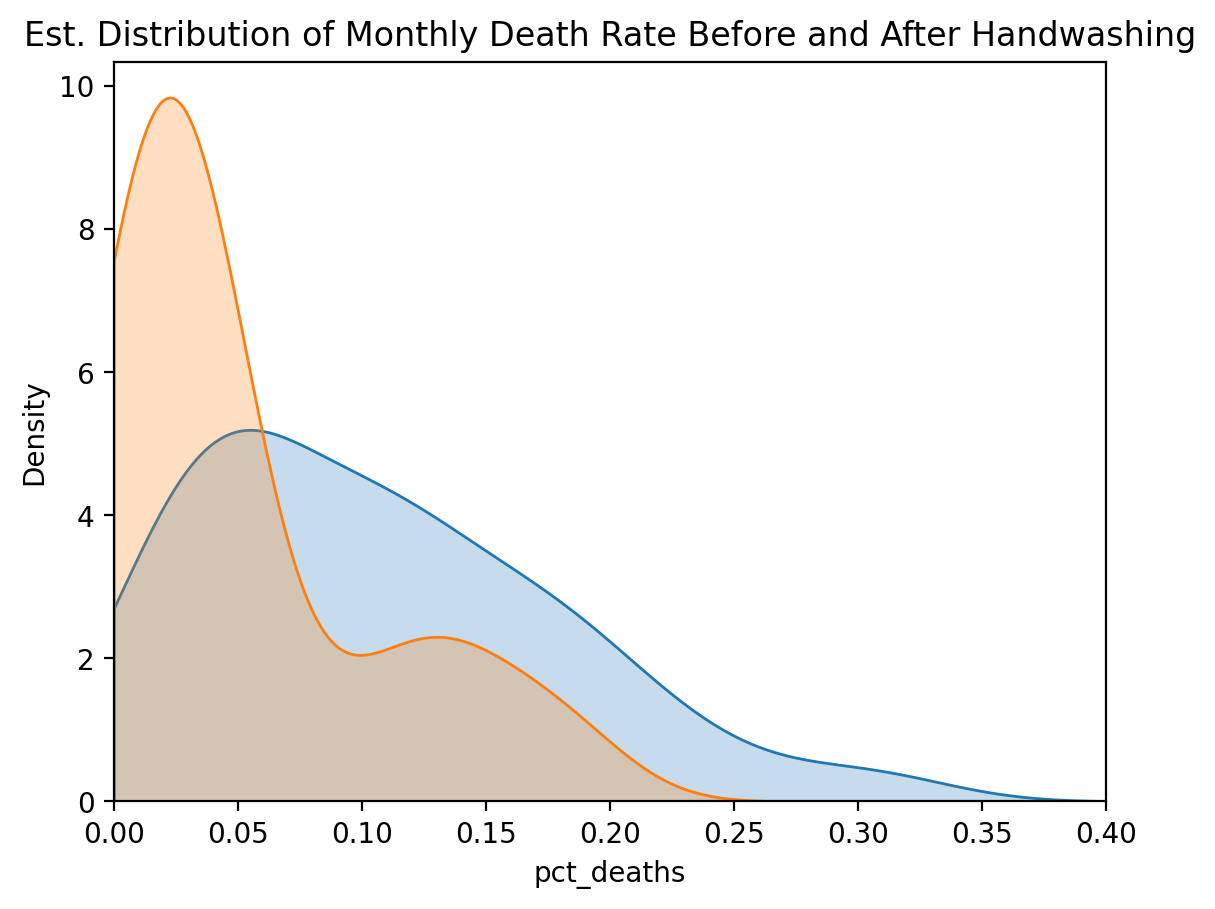

In [84]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

In [85]:
# We can test whether our distributions ended up looking 
# so different purely by chance (i.e., the lower death rate is just an accident) 
# or if the  difference in the average death rate is statistically significant.

In [89]:
# Use a T-Test to Show Statistical Significance

# If the p-value is less than 1% then we can be 99% certain 
# that handwashing has made a difference to the average monthly death rate.
import scipy.stats as stats

In [90]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0002504345
t-statstic is 3.804


In [92]:
# When we calculate the p_value we see that it
# is 0.0002504345 which is far below even 1%.
# In other words, the difference in means is 
# highly statistically significant and we can go ahead on publish our research paper